# MGT-6203

# Team-48

# Analysis of Mobile Data 2023

In [1]:
# Install packages if missing
packages <- c("ggplot2", "corrplot", "car", "MASS", "dplyr", "lubridate","randomForest","xgboost", "caret", "stats")
install.packages(setdiff(packages, rownames(installed.packages()))) 

In [2]:
# Load library
library(ggplot2)
library(corrplot)
library(car)
library(MASS)
library(dplyr)
library(lubridate)
library(caret)
library(glmnet)
library(randomForest)
library(xgboost)
library(Matrix)
library(stats)

corrplot 0.92 loaded

Loading required package: carData


Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: lattice

Loading required package: Matrix

Loaded glmnet 4.1-7

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin



Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




### Step 1: Loading Datasets

In [3]:
# get current directory and reference to it
setwd("..")
getwd()

[1] "C:/Users/moham/GitHub/Team-48"

In [4]:
# read web-scrapped Flipkart data
orig_flipkart_2023 <- read.csv('Data/2023_processed_flipkart_mobiles.csv')
head(orig_flipkart_2023, 3)

,brand,name,price,rating,num_rating,num_reviews,display,battery_capacity,processor,ram_gb,storage_gb,expandable_upto_gb,color,n_rear_cams,best_rear_cam,best_front_cam,n_front_cams
,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>
1,NOKIA,1,3799,3.9,13808,1615,11.43,2150,MT6737M QUAD CORE 1.1 GHZ,1,8,128,DARK BLUE,1,5,2,1
2,HTC,10,47990,4.2,144,43,13.21,3000,QUALCOMM SNAPDRAGON 820 64-BIT,4,32,2000,CARBON GRAY,1,12,5,1
3,REDMI,10,11999,4.2,25936,1871,17.02,6000,QUALCOMM SNAPDRAGON 680,6,128,1000,CARIBBEAN GREEN,2,50,5,1


In [5]:
# read gadgets360 web-scrapped data
orig_gadgets360_2023 <- read.csv('Data/2023_gadget360.csv')
head(orig_gadgets360_2023, 3)

,X1.Stars,X3.Stars,X5.Stars,X4.Stars,X2.Stars,url,Model,Brand,Rear.camera,Front.camera,...,X3G.1,X3G.2,GSM.CDMA.2,GSM.CDMA.1,SIM.Type.2,SIM.Type.1,Total.Ratings,Product.Name,Expandable.storage.up.to..GB.,Supports.4G.in.India..Band.40..1
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5,6,70,18,2,https://www.gadgets360.com/vivo-v11-pro-5632,V11 Pro,Vivo,12-megapixel (f/1.8) + 5-megapixel (f/2.4),25-megapixel (f/2.0),...,Yes,Yes,GSM,GSM,Nano-SIM,Nano-SIM,"6,534","Vivo V11 Pro (6GB RAM, 64GB) - Starry Night Black",256,Yes
2,5,6,70,18,2,https://www.gadgets360.com/vivo-v11-pro-5632,V11 Pro,Vivo,12-megapixel (f/1.8) + 5-megapixel (f/2.4),25-megapixel (f/2.0),...,Yes,Yes,GSM,GSM,Nano-SIM,Nano-SIM,"6,534","Vivo V11 Pro (6GB RAM, 64GB) - Dazzling Gold",256,Yes
3,5,6,70,18,2,https://www.gadgets360.com/vivo-v11-pro-5632,V11 Pro,Vivo,12-megapixel (f/1.8) + 5-megapixel (f/2.4),25-megapixel (f/2.0),...,Yes,Yes,GSM,GSM,Nano-SIM,Nano-SIM,"6,534","Vivo V11 Pro (6GB RAM, 64GB) - Supernova Red",256,Yes


### Step 2: Data Pre-processing

#### FlipKart Data

In [6]:
dim(orig_flipkart_2023)
paste0('Initial Number of rows ', nrow(orig_flipkart_2023))

[1] 1998   17

[1] "Initial Number of rows 1998"

In [7]:
# Remove Useless columns
flipkart_2023 <- subset(orig_flipkart_2023, select = c('name', 'brand', 'price', 'rating', 'display', 'battery_capacity', 'ram_gb', 
                                         'storage_gb', 'expandable_upto_gb', 
                                         'n_rear_cams', 'best_rear_cam', 'best_front_cam', 'n_front_cams'))
dim(flipkart_2023)

[1] 1998   13

In [8]:
# Number of rows with missing Values
flipkart_missing <- nrow(flipkart_2023) - nrow(flipkart_2023[complete.cases(flipkart_2023), ])
paste0('Number of rows with missing values ', flipkart_missing)
# Drop rows with missing values
flipkart_2023 <- flipkart_2023[complete.cases(flipkart_2023), ]
paste0('Cleaned Number of Rows  ', nrow(flipkart_2023))

[1] "Number of rows with missing values 0"

[1] "Cleaned Number of Rows  1998"

In [9]:
# remove duplicates
flipkart_2023 <-flipkart_2023[order(flipkart_2023[, "price"], decreasing=TRUE),]
flipkart_2023 <- flipkart_2023[!duplicated(flipkart_2023[c("brand", "name", "rating")]), ]
paste0('Final Number of Rows ', nrow(flipkart_2023))

[1] "Final Number of Rows 1040"

#### Gadgets360

In [10]:
paste0(dim(orig_gadgets360_2023))
paste0('Initial Number of rows ', nrow(orig_gadgets360_2023))

[1] "8695" "50"

[1] "Initial Number of rows 8695"

In [11]:
# Remove useless columns
gadgets360_2023 <- subset(orig_gadgets360_2023, select = c('Brand', 'Model', 'Release.date', 'Operating.system',
                                                           'Touchscreen', 'Number.of.SIMs'))
dim(gadgets360_2023)

[1] 8695    6

In [12]:
# Number of rows with missing Values
gadgets360_missing <- nrow(gadgets360_2023) - nrow(gadgets360_2023[complete.cases(gadgets360_2023), ])
paste0('Number of rows with missing values ', gadgets360_missing)
# Drop rows with missing values
gadgets360_2023 <- gadgets360_2023[complete.cases(gadgets360_2023), ]
paste0('Cleaned Number of Rows  ', nrow(gadgets360_2023))

[1] "Number of rows with missing values 895"

[1] "Cleaned Number of Rows  7800"

In [13]:
# remove duplicates
gadgets360_2023 <- gadgets360_2023[!duplicated(gadgets360_2023[c("Brand", "Model")]), ]
paste0('Final Number of Rows ', nrow(gadgets360_2023))

[1] "Final Number of Rows 4268"

### Step 3: Merging Datasets

In [14]:
# Prepare for merging (Upper case and remove white spaces)
# Flipkart
flipkart_2023$name = toupper(flipkart_2023$name)
flipkart_2023$brand = toupper(flipkart_2023$brand)
flipkart_2023$name <- trimws(flipkart_2023$name, which = c("both"))
flipkart_2023$brand <- trimws(flipkart_2023$brand, which = c("both"))
# Gadgets360
gadgets360_2023$Model = toupper(gadgets360_2023$Model)
gadgets360_2023$Brand = toupper(gadgets360_2023$Brand)
gadgets360_2023$Model <- trimws(gadgets360_2023$Model, which = c("both"))
gadgets360_2023$Brand <- trimws(gadgets360_2023$Brand, which = c("both"))

In [15]:
# Clean Phone Name in Gadgets360
# Remove (2020)
gadgets360_2023$Model <- sub("\\s*\\(.*", "", gadgets360_2023$Model)

In [16]:
# Merge Datasets
merged_df <- merge(flipkart_2023, gadgets360_2023, by.y=c("Brand","Model"), by.x=c("brand","name"), all=FALSE)
paste0('Final Number of Rows ', nrow(merged_df))
dim(merged_df)
head(merged_df, 3)

[1] "Final Number of Rows 600"

[1] 600  17

,brand,name,price,rating,display,battery_capacity,ram_gb,storage_gb,expandable_upto_gb,n_rear_cams,best_rear_cam,best_front_cam,n_front_cams,Release.date,Operating.system,Touchscreen,Number.of.SIMs
,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>
1,ACER,LIQUID Z530,6999,3.8,12.70,2420,2,16,32,1,8,8,1,Sep-15,Android 5.1,Yes,1
2,ALCATEL,3V,10999,3.7,15.24,3000,3,32,128,2,16,8,1,Feb-18,Android 8.0,Yes,2
3,ALCATEL,FLASH 2,9999,3.9,12.70,3000,2,16,128,1,13,0,0,Sep-15,Android 5.1,Yes,2


### Step 3: Final Dataset Pre-processing

In [17]:
final_df <- merged_df
# Operating System
final_df$Operating.system <- ifelse(grepl('Android', final_df$Operating.system), 'Android', 'OTHER')
# Release Date
final_df$Release.date <- parse_date_time(final_df$Release.date, orders = c("mdy", "bYd", "Y-m-d", "d-b-Y", "b-y", "b-Y"))
final_df$days_since_release <- as.numeric(difftime(as.Date("2023-03-01"), final_df$Release.date, units = "days"))
final_df$Release.date <- NULL
# drop missing Values if any
final_df <- final_df[complete.cases(final_df), ]
head(final_df, 3)

,brand,name,price,rating,display,battery_capacity,ram_gb,storage_gb,expandable_upto_gb,n_rear_cams,best_rear_cam,best_front_cam,n_front_cams,Operating.system,Touchscreen,Number.of.SIMs,days_since_release
,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<dbl>
1,ACER,LIQUID Z530,6999,3.8,12.70,2420,2,16,32,1,8,8,1,Android,Yes,1,2738
2,ALCATEL,3V,10999,3.7,15.24,3000,3,32,128,2,16,8,1,Android,Yes,2,1854
3,ALCATEL,FLASH 2,9999,3.9,12.70,3000,2,16,128,1,13,0,0,Android,Yes,2,2738


In [18]:
# Factor columns
final_df$brand <- as.factor(final_df$brand)
final_df$Operating.system <- as.factor(final_df$Operating.system)
final_df$Touchscreen <- ifelse(final_df$Touchscreen != 'Yes', 'No', final_df$Touchscreen)
final_df$Touchscreen <- as.factor(final_df$Touchscreen)
# drop phone name
final_df$name <- NULL

In [19]:
summary(final_df)
dim(final_df)

       brand         price            rating         display      
 VIVO     : 86   Min.   :  1489   Min.   :2.300   Min.   :  4.50  
 ASUS     : 49   1st Qu.:  8499   1st Qu.:3.900   1st Qu.: 13.21  
 OPPO     : 49   Median : 12499   Median :4.100   Median : 14.83  
 SAMSUNG  : 38   Mean   : 16813   Mean   :4.092   Mean   : 14.90  
 NOKIA    : 36   3rd Qu.: 19990   3rd Qu.:4.300   3rd Qu.: 16.51  
 PANASONIC: 35   Max.   :128999   Max.   :4.700   Max.   :167.64  
 (Other)  :306                                                    
 battery_capacity     ram_gb         storage_gb      expandable_upto_gb
 Min.   :1020     Min.   : 0.004   Min.   :  0.004   Min.   :    0.0   
 1st Qu.:3000     1st Qu.: 2.000   1st Qu.: 16.000   1st Qu.:   32.0   
 Median :3500     Median : 3.000   Median : 32.000   Median :  128.0   
 Mean   :3692     Mean   : 3.782   Mean   : 61.469   Mean   :  374.6   
 3rd Qu.:5000     3rd Qu.: 4.000   3rd Qu.: 64.000   3rd Qu.:  256.0   
 Max.   :7000     Max.   :18.000

[1] 599  16

### Step 4: Exploratory Data Analysis

#### Evaluate Correlation coefficients (Numeric Variables)

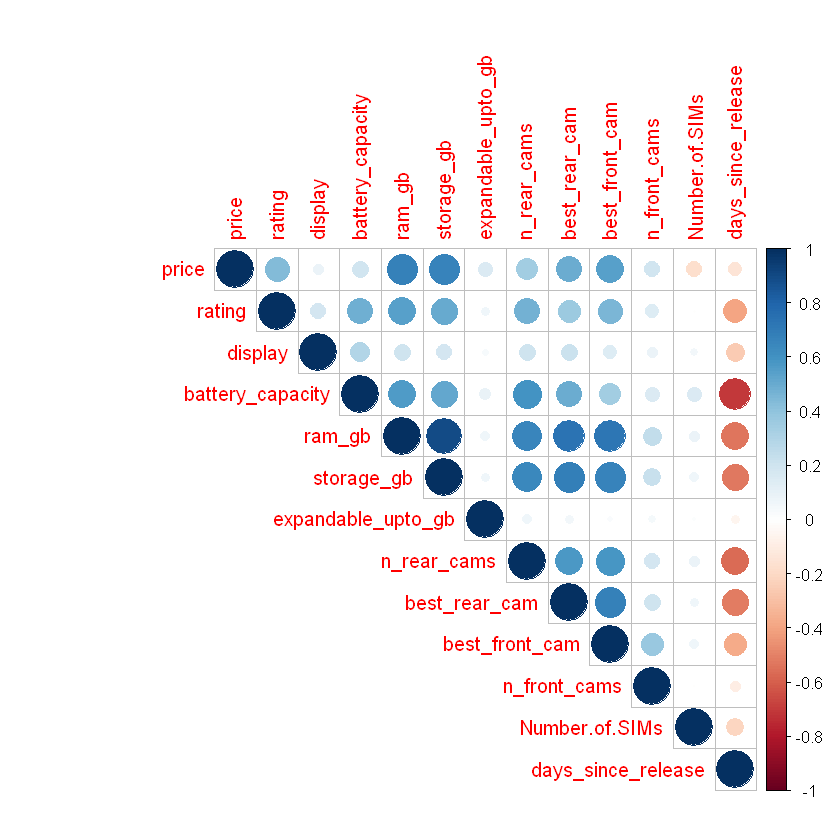

In [20]:
# define non-numeric variables
char_variables <- c('brand', 'Operating.system', 'Touchscreen')
num_final_df <- final_df[, !(names(final_df) %in% char_variables)] 
# calculate correlation matrix
corr_matrix <- cor(num_final_df)
# Plot the correlation matrix
corrplot(corr_matrix, method="circle", type="upper")

#### Variance Inflation Factor (VIF)

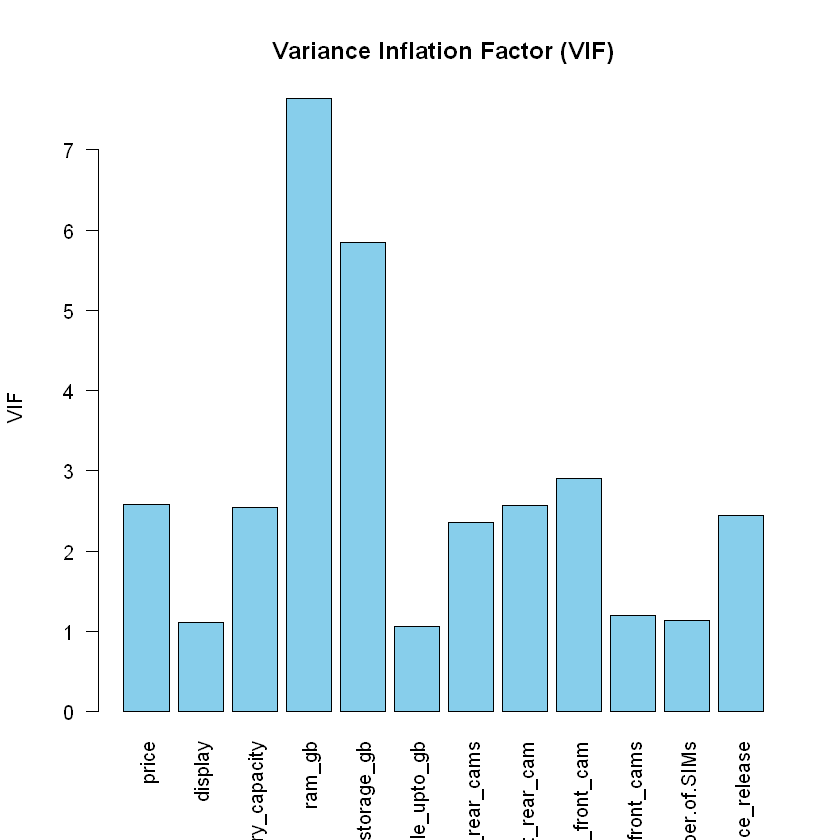

In [21]:
# build basic model
vif_lm <- lm(rating~., data=num_final_df)
# Calculate and Plot VIF
vif_values <- vif(vif_lm)
barplot(vif_values, main = "Variance Inflation Factor (VIF)",  ylab = "VIF", col = "skyblue", las = 2)

#### Factor Variables

In [22]:
summary(final_df$Touchscreen)
summary(final_df$Operating.system)

No Yes 
 17 582

Android   OTHER 
    585      14

In [23]:
length(levels(final_df$brand))
table(final_df$brand)

[1] 42


            ACER          ALCATEL             ASUS          COOLPAD 
               1                5               49                8 
            DIZO        ENERGIZER           GIONEE           GOOGLE 
               2                1               13                1 
           HONOR              HTC           HUAWEI          INFOCUS 
              32               12                3                1 
           INTEX             IQOO             ITEL           IVOOMI 
              14                1                4                2 
            JIVI          KARBONN             LAVA           LENOVO 
               1                2               27               29 
              LG              LYF MARQ BY FLIPKART            MEIZU 
              15                9                1                4 
        MICROMAX         MOTOROLA              MTS            NOKIA 
              14               22                1               36 
           NUBIA          ONEPLUS

#### Check distribution of Y variable

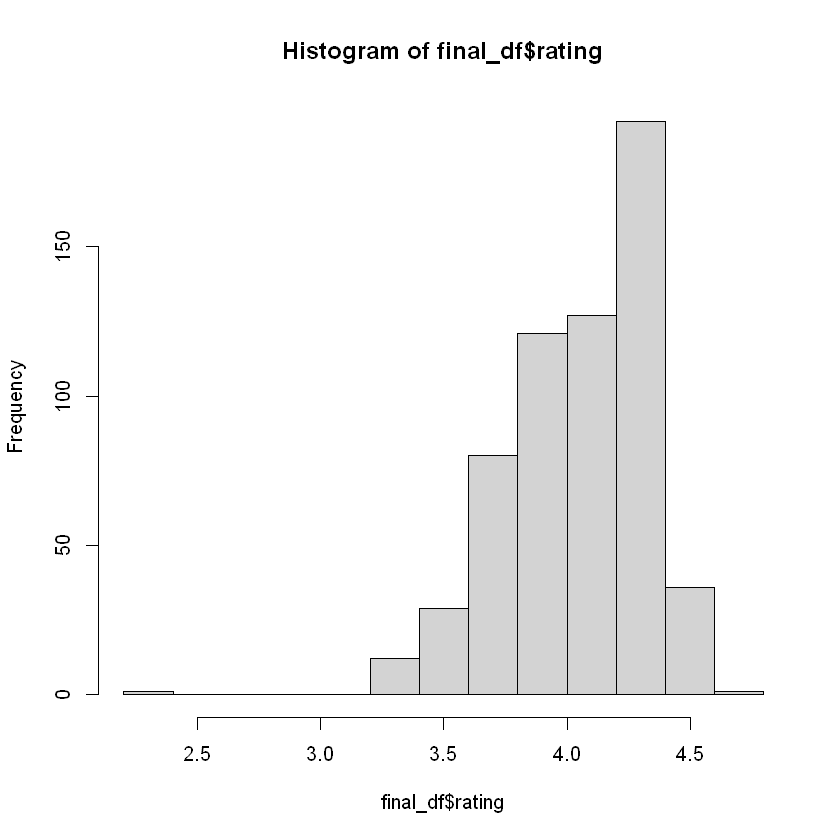

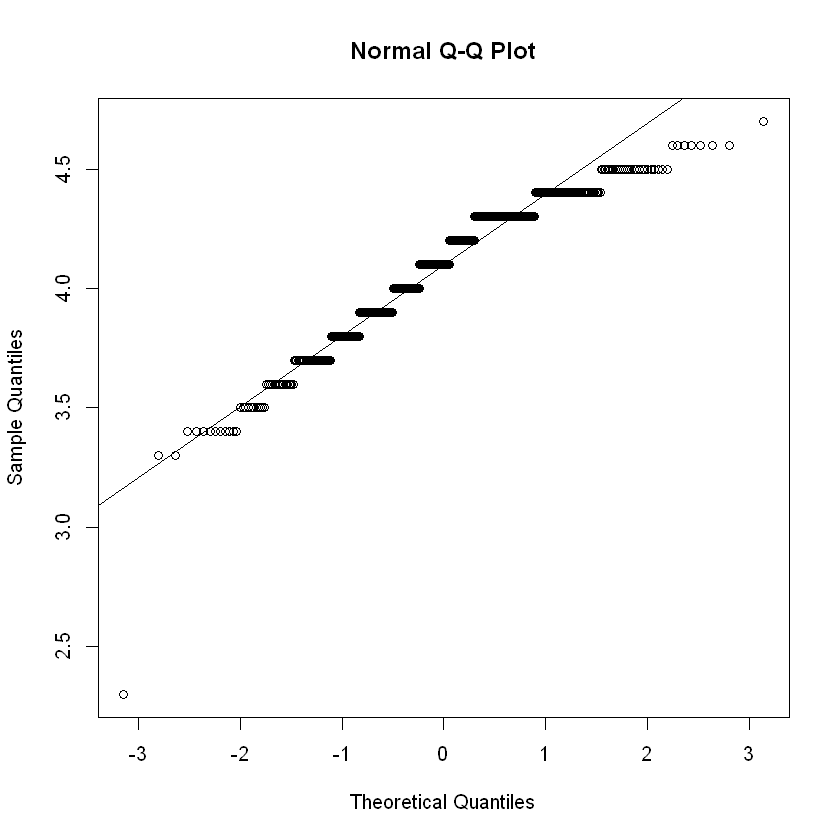

In [24]:
hist(final_df$rating)
# QQplot of Y-Variable
qqnorm(final_df$rating)
qqline(final_df$rating)

#### Remove Outliers

In [25]:
filter(final_df, rating < 3)

brand,price,rating,display,battery_capacity,ram_gb,storage_gb,expandable_upto_gb,n_rear_cams,best_rear_cam,best_front_cam,n_front_cams,Operating.system,Touchscreen,Number.of.SIMs,days_since_release
<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<int>,<dbl>
JIVI,7588,2.3,12.7,2400,1,16,32,1,8,5,1,Android,Yes,1,2038


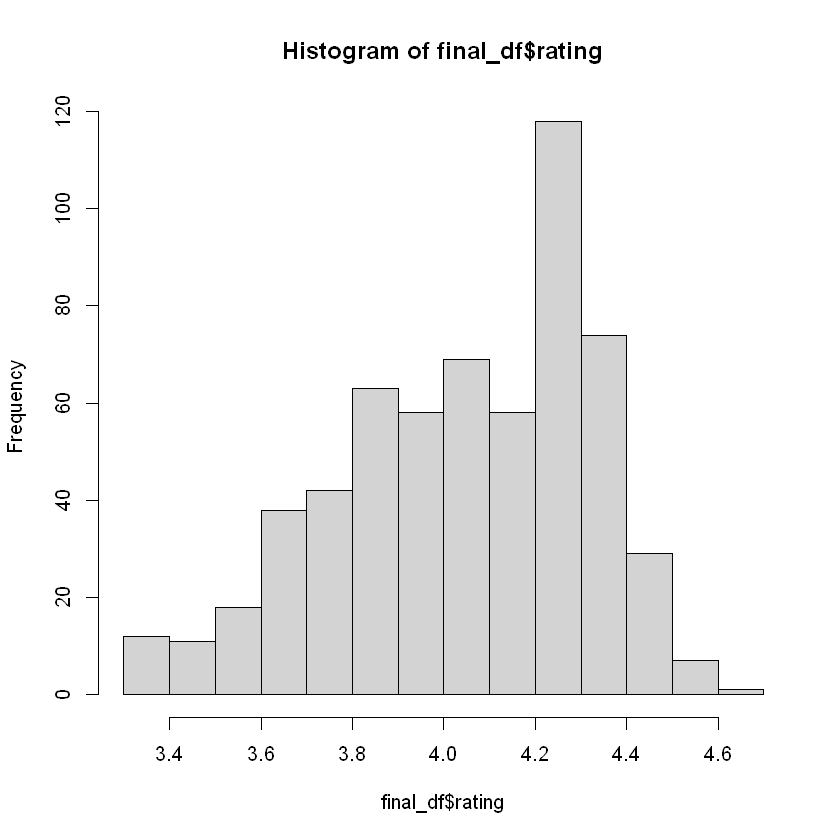

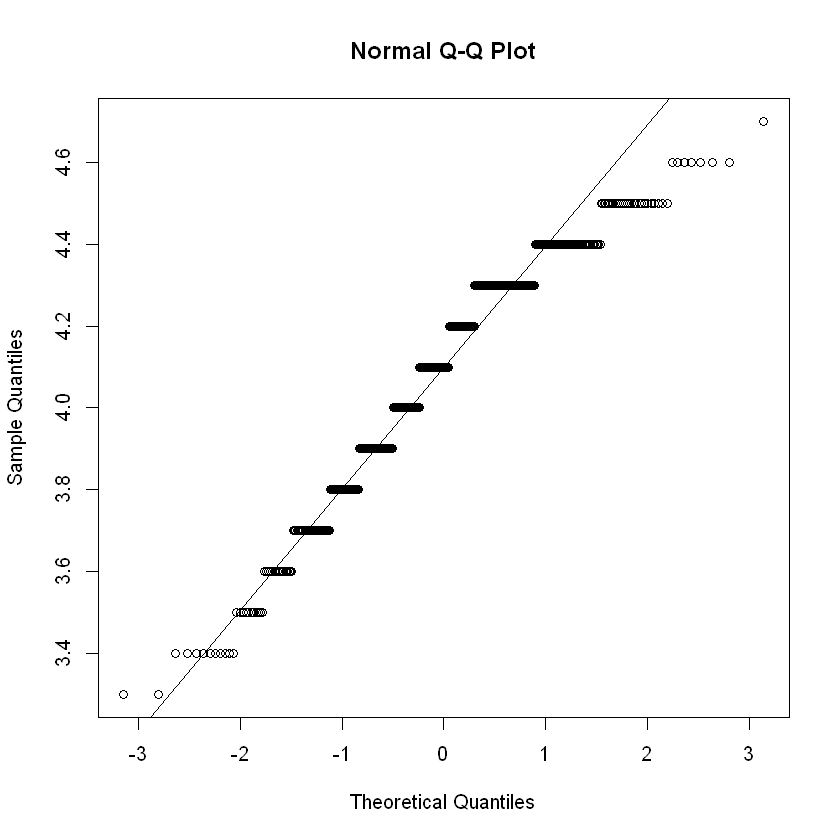

In [26]:
# filter to rating >= 3
final_df <- filter(final_df, rating >= 3)
hist(final_df$rating)
# QQplot of Y-Variable
qqnorm(final_df$rating)
qqline(final_df$rating)

### Step 5: Model preparation

In [27]:
#Remove Touchscreen as a variable
final_df <- final_df[final_df$Touchscreen == "Yes", ]
final_df$Touchscreen<-NULL

In [28]:
#Remove brands with only one phone
final_df<-subset(final_df,final_df$brand !='ACER' & final_df$brand !='ENERGIZER'& final_df$brand !='GOOGLE'&final_df$brand !='INFOCUS'&final_df$brand !='IQOO' &
final_df$brand !='JIVI'& final_df$brand !='MARQ BY FLIPKART'&final_df$brand !='MTS'&final_df$brand !='NUBIA'&final_df$brand !='SMARTRON'&
final_df$brand !='SWIPE'&final_df$brand !='ZEN'&final_df$brand !='ZOPO'&final_df$brand !='KARBONN'&final_df$brand !='KARBONN'&final_df$brand !='HUAWEI'&
                 final_df$brand !='ITEL'&final_df$brand !='IVOOMI', ) 

In [29]:
#Variable Types
str(final_df)

'data.frame':	559 obs. of  15 variables:
 $ brand             : Factor w/ 42 levels "ACER","ALCATEL",..: 2 2 2 2 2 3 3 3 3 3 ...
 $ price             : int  10999 9999 9499 9499 6499 43999 42999 57999 57999 79999 ...
 $ rating            : num  3.7 3.9 4.4 4.4 3.6 4.3 4.3 4.4 4.1 4.6 ...
 $ display           : num  15.2 12.7 15.2 15.2 12.7 ...
 $ battery_capacity  : int  3000 3000 2580 2580 2200 5000 4000 6000 6000 6000 ...
 $ ram_gb            : num  3 2 1.5 1.5 2 8 8 12 12 18 ...
 $ storage_gb        : num  32 16 16 16 16 256 128 256 256 512 ...
 $ expandable_upto_gb: num  128 128 64 64 32 2000 0 0 0 0 ...
 $ n_rear_cams       : int  2 1 1 1 1 2 2 3 3 3 ...
 $ best_rear_cam     : num  16 13 8 8 13 48 64 64 64 64 ...
 $ best_front_cam    : num  8 0 5 5 8 48 12 24 24 24 ...
 $ n_front_cams      : int  1 0 1 1 1 2 1 1 1 1 ...
 $ Operating.system  : Factor w/ 2 levels "Android","OTHER": 1 1 1 1 1 1 1 1 1 1 ...
 $ Number.of.SIMs    : int  2 2 2 2 2 2 2 2 2 2 ...
 $ days_since_release: num

#### Split Data for Training and Testing

In [30]:
set.seed(114)
#split into train and test
trainIndex <- createDataPartition(final_df$rating, p = 0.7, list = FALSE)
train <- final_df[trainIndex,]
test <- final_df[-trainIndex,]

#### Use Cook's Distance to Identify Outliers

In [31]:
temp_model <- lm(rating ~ ., data = train)
#Use Cook's Distance
train$cooks <-cooks.distance(temp_model)
# remove the outlier
train <- filter(train, cooks < 1)
train$cooks <- NULL

#### Calculate Leverage points

In [32]:
temp_model <- lm(rating ~ ., data = train)
train$leverage <- hatvalues(temp_model)
# remove the outlier
train <- filter(train, leverage < 1)
train$leverage <- NULL

### Step 6: Modelling

#### Linear Regression 

In [33]:
#Train model
first_model <- lm(rating ~ ., data = train)
#Predict test data
predictions1 <- predict(first_model, newdata = test)
#Model summary
summary(first_model)


Call:
lm(formula = rating ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51453 -0.07411  0.01063  0.08620  0.40925 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.291e+00  2.047e-01  16.075  < 2e-16 ***
brandASUS              3.897e-02  7.839e-02   0.497 0.619417    
brandCOOLPAD          -1.722e-01  1.165e-01  -1.478 0.140242    
brandGIONEE           -6.320e-02  9.258e-02  -0.683 0.495277    
brandHONOR             2.510e-01  8.066e-02   3.112 0.002010 ** 
brandHTC               7.456e-02  9.283e-02   0.803 0.422435    
brandINTEX            -2.991e-01  8.839e-02  -3.384 0.000795 ***
brandLAVA             -1.161e-02  8.074e-02  -0.144 0.885701    
brandLENOVO            2.758e-02  8.033e-02   0.343 0.731567    
brandLG               -5.321e-02  9.097e-02  -0.585 0.559020    
brandLYF              -2.371e-01  1.077e-01  -2.203 0.028263 *  
brandMEIZU            -1.845e-01  1.076e-01  -1.715 0.0

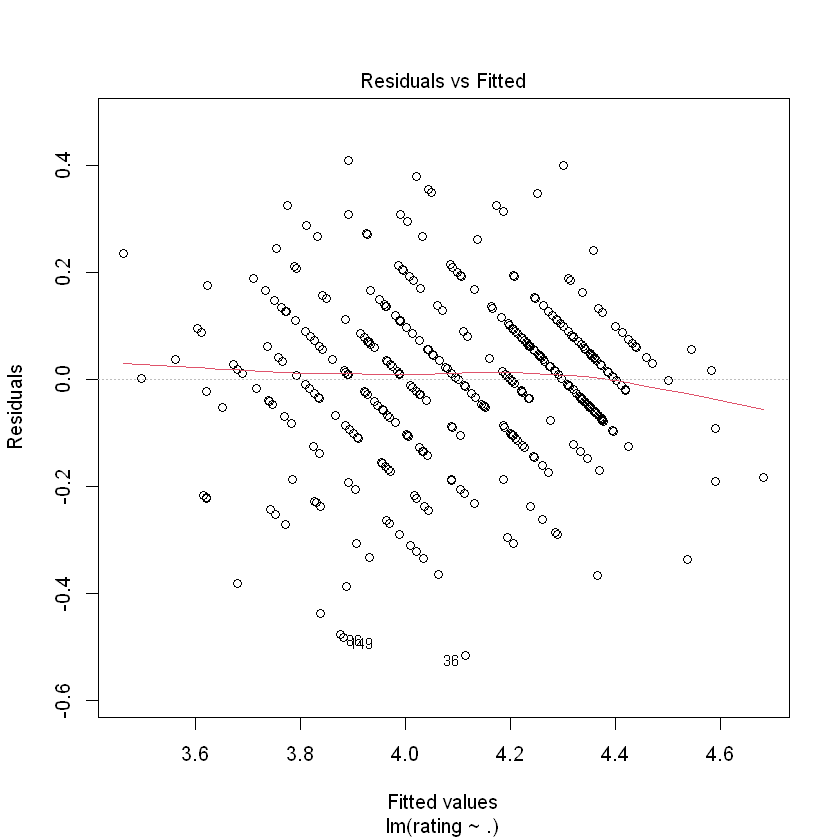

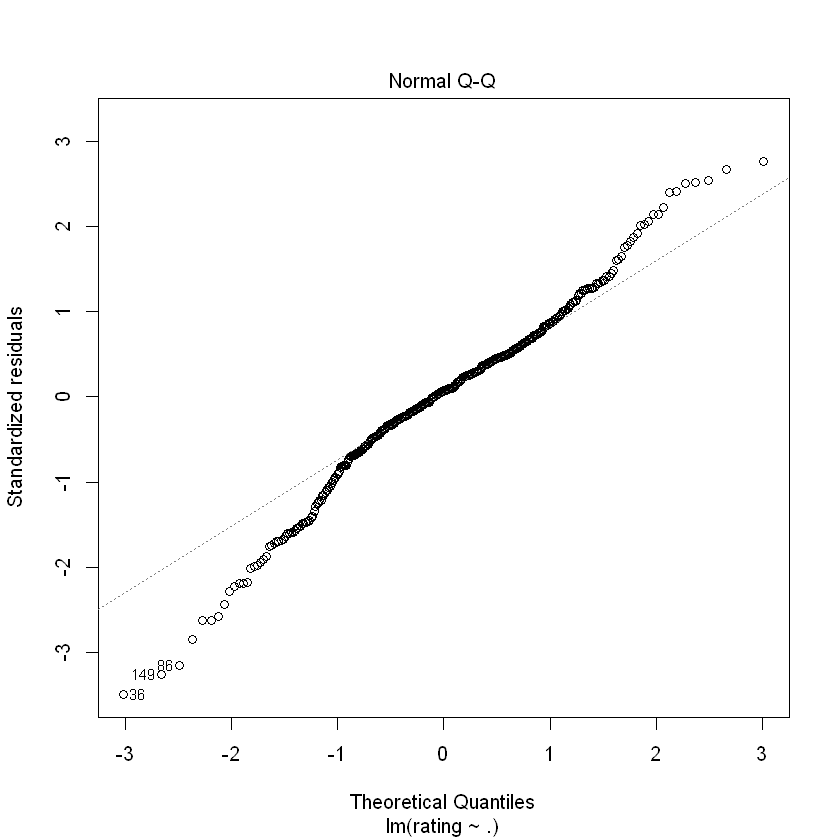

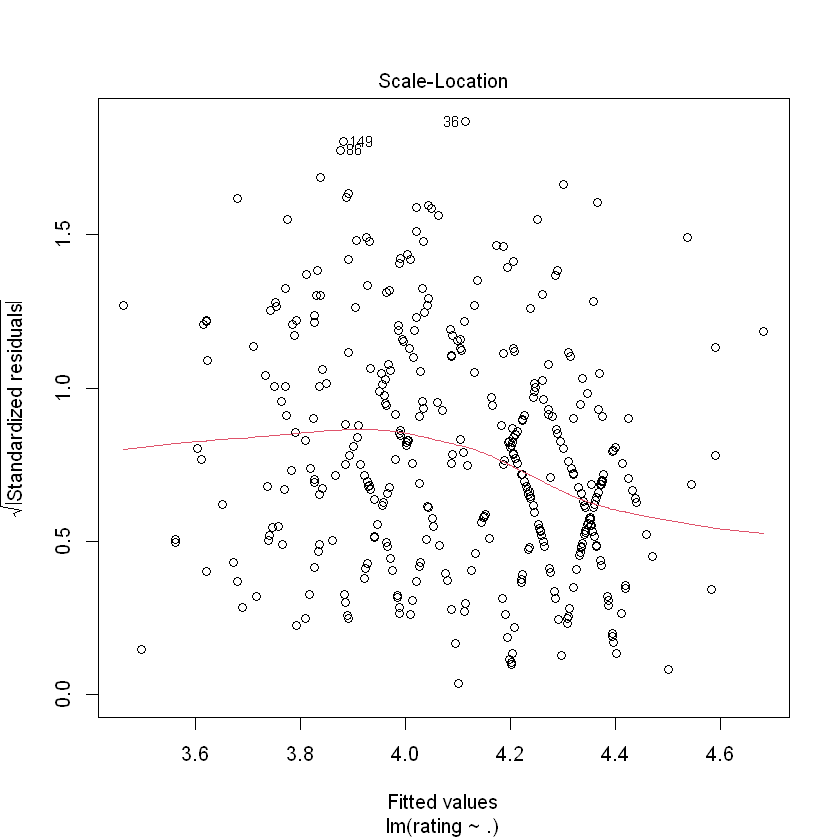

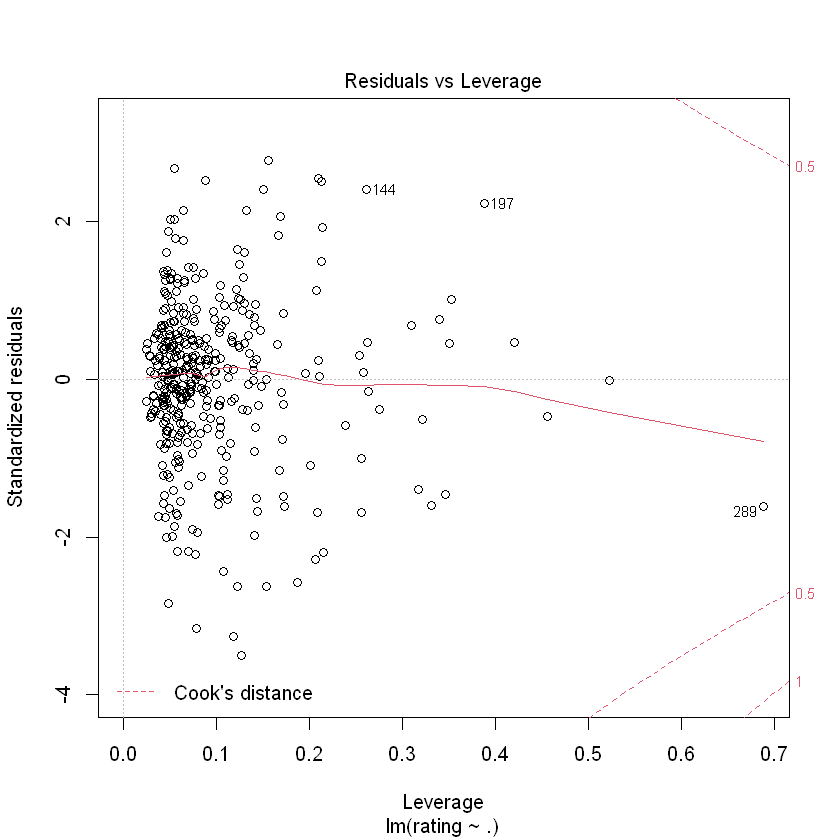

In [34]:
plot(first_model)

#### Retrain linear regression model with significant features only

In [35]:
#Final model
final_model <- lm(rating ~ brand+price+display+best_rear_cam, data = train)
#Predict test data
predictions2 <- predict(final_model, newdata = test)
summary(final_model)


Call:
lm(formula = rating ~ brand + price + display + best_rear_cam, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54094 -0.07572  0.00949  0.09035  0.41189 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.400e+00  1.197e-01  28.412  < 2e-16 ***
brandASUS       3.237e-02  7.622e-02   0.425 0.671304    
brandCOOLPAD   -1.752e-01  1.151e-01  -1.523 0.128670    
brandGIONEE    -4.837e-02  8.988e-02  -0.538 0.590773    
brandHONOR      2.400e-01  7.890e-02   3.042 0.002523 ** 
brandHTC        6.520e-02  9.190e-02   0.709 0.478504    
brandINTEX     -3.211e-01  8.726e-02  -3.680 0.000268 ***
brandLAVA      -1.968e-02  7.874e-02  -0.250 0.802768    
brandLENOVO     3.353e-02  7.765e-02   0.432 0.666102    
brandLG        -8.782e-02  8.845e-02  -0.993 0.321406    
brandLYF       -2.410e-01  1.064e-01  -2.266 0.024029 *  
brandMEIZU     -1.766e-01  1.057e-01  -1.671 0.095541 .  
brandMICROMAX  -1.118e-01  8.649e-02  

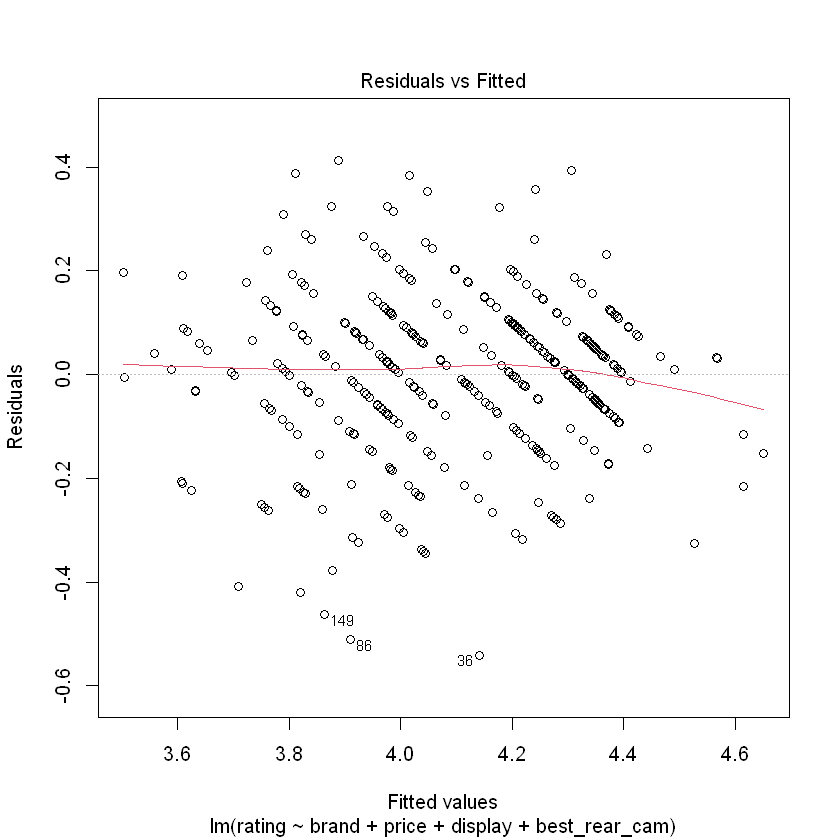

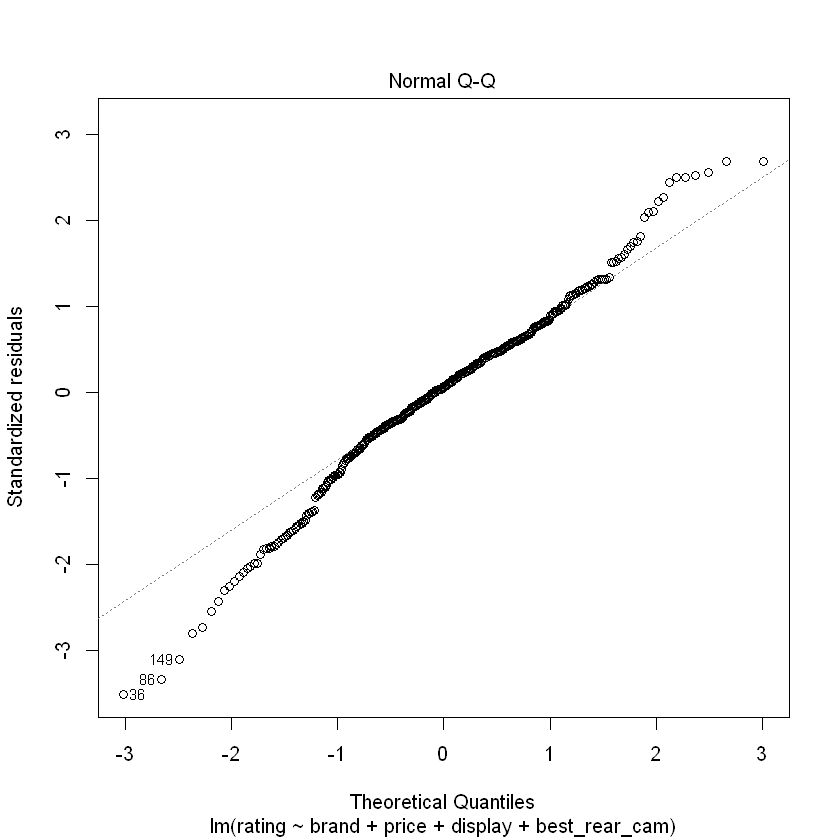

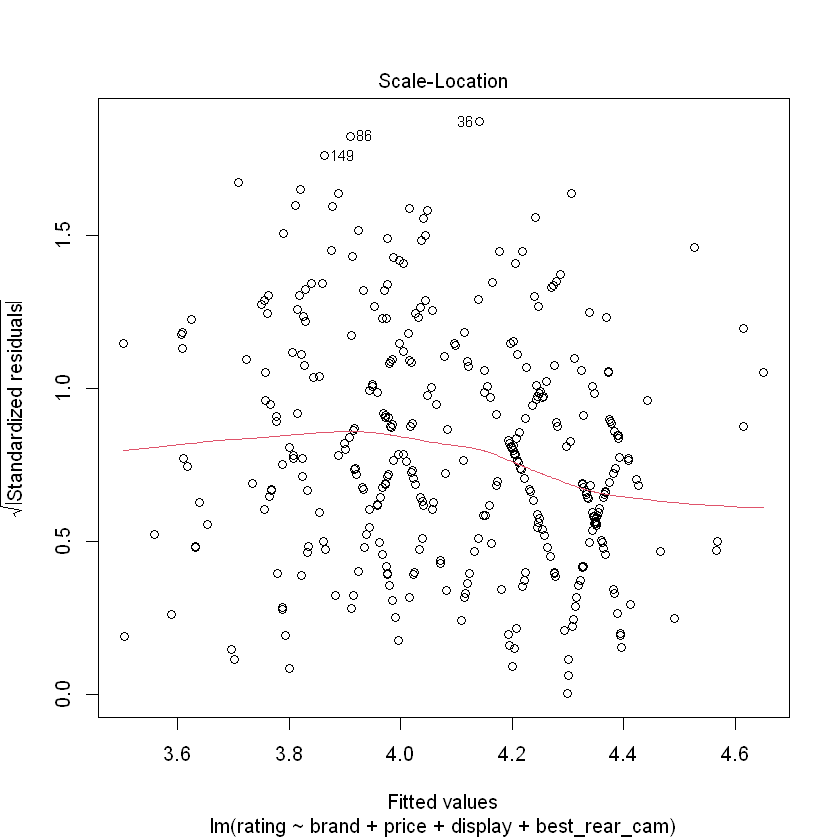

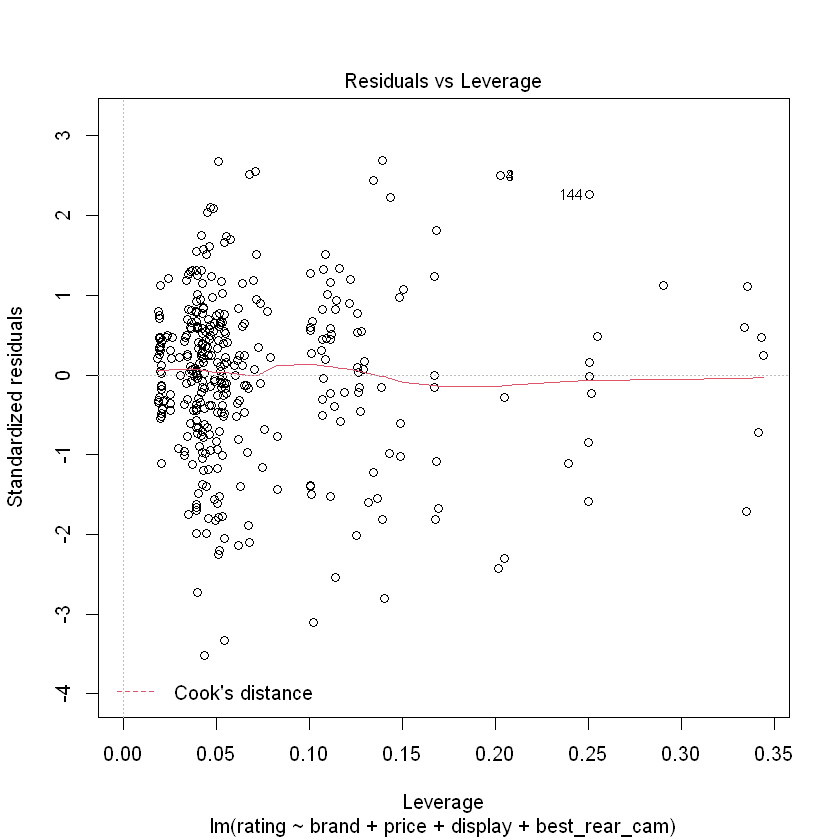

In [36]:
plot(final_model)

In [37]:
#Calculate mean-squared error
linear_regression_mse <- mean((test$rating - predictions2)^2)
linear_regression_rmse <- sqrt(linear_regression_mse)
#R-Squared
lm_r_squared <- summary(final_model)$adj.r.squared

#### Random Forest

In [38]:
# Train random forest regression model 
random_forest_model <- randomForest(rating ~ ., data = train, ntree = 1000)
# Make predictions on the test set using the predict() function
predictions <- predict(random_forest_model, newdata = test)

In [39]:
# Calculate mean squared error (MSE)
random_forest_mse <- mean((test$rating - predictions)^2)
random_forest_rmse <- sqrt(random_forest_mse)

In [40]:
#R-squared
rf_rsquared <- R2(predictions, test$rating)
rf_rsquared

[1] 0.6770257

In [41]:
importance(random_forest_model)

,IncNodePurity
brand,10.19149639
price,2.99539187
display,4.01059282
battery_capacity,2.32709978
ram_gb,1.41725511
storage_gb,1.61803136
expandable_upto_gb,0.85052773
n_rear_cams,0.56192980
best_rear_cam,0.60122114
best_front_cam,1.28564135


#### XGBoost

[14:32:00] WARNING: amalgamation/../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


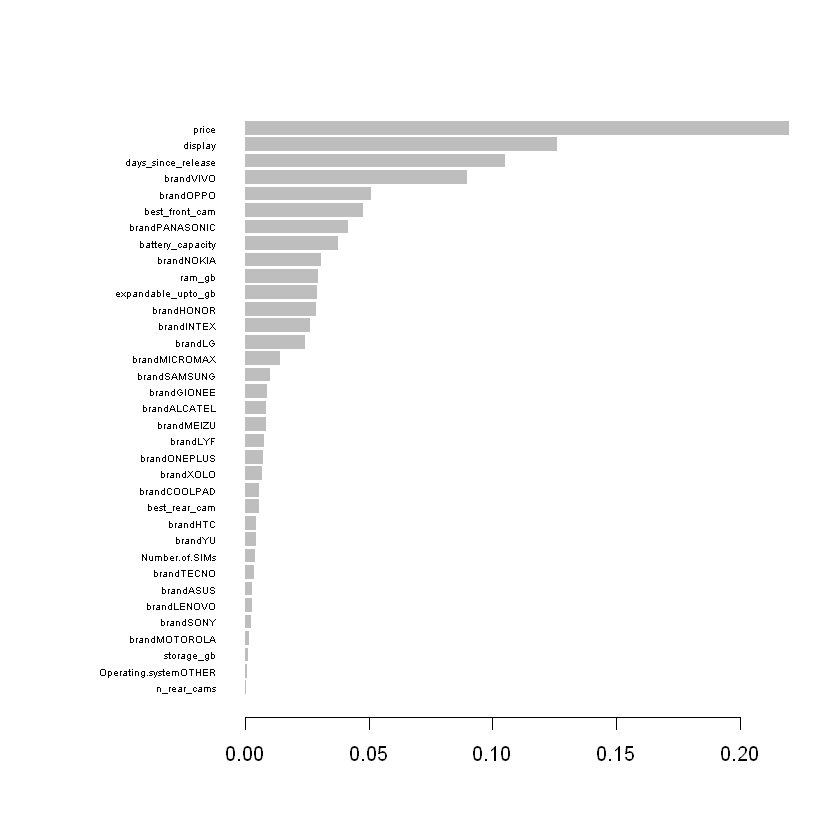

In [42]:
train_mtx <- sparse.model.matrix(rating ~ ., data = train)
test_mtx <- sparse.model.matrix(rating ~ ., data = test)

dtrain <- xgb.DMatrix(data = train_mtx, label = train$rating)
dtest <- xgb.DMatrix(data =test_mtx,label=test$rating)

# train XGBoost model
xgb_model <- xgboost(data = dtrain, max_depth = 3, eta = 0.1, nrounds = 100, objective = "reg:linear", verbose = 0)

# get feature importance
xgb_importance <- xgb.importance(attr(train_mtx, "dimnames")[[2]], model = xgb_model)

# plot feature importance
xgb.plot.importance(xgb_importance)

In [43]:
# Make predictions on the test set using the predict() function
predictions <- predict(xgb_model, newdata = test_mtx)
# Calculate mean squared error (MSE)
xgboost_mse <- mean((test$rating - predictions)^2)
xgboost_rmse <- sqrt(xgboost_mse)
#R-squared
xgboost_rsquared <- R2(predictions, test$rating)
xgboost_rsquared

[1] 0.629838

### Step 7: Models Comparison

In [44]:
#Model Comparison Table

table <- matrix(c(lm_r_squared , linear_regression_mse, linear_regression_rmse, 
                  rf_rsquared,random_forest_mse,random_forest_rmse,
                  xgboost_rsquared, xgboost_mse, xgboost_rmse), 
                ncol=3)

#specify row and column names of matrix
rownames(table) <- c('R-Squared', 'MSE', 'RMSE')

colnames(table) <- c('Linear Regression','Random Forest', 'XGBoost')

#convert matrix to table
table <- as.table(table)
table

          Linear Regression Random Forest    XGBoost
R-Squared        0.66412819    0.67702566 0.62983795
MSE              0.02584194    0.02546659 0.02865538
RMSE             0.16075429    0.15958255 0.15958255